Extraction from Django API

In [1]:
# Import the necessary python packages
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt

# Import API
import urllib.request, json, csv

# Make a network and plot it
import networkx as nx
from pyvis import network as net
from pyvis.network import Network

In [2]:
# Import the birds dataset
with urllib.request.urlopen("https://gracula.psyc.virginia.edu/birds/api/pedigree/?species=zebf") as url:
    data = pd.read_json(url)
# print(data)

In [3]:
data["uuid"] = data["uuid"].str[:6]
# data

In [4]:
# Remove birds with no Dam or no Sire
# Define a function that drops rows
def filter_rows_by_values(df, col, values):
    return df[~df[col].isin(values)]

data = filter_rows_by_values(data, "sire", [None])
# data

In [5]:
# Save as a csv
data.to_csv('../build/pedigree.csv', encoding='utf-8', index=False)

In [6]:
# Use NetworkX to build the network out of the csv
# Define the variables to extract:
name = data["name"]
sire = data["sire"]
dam = data["dam"]
alive = data["alive"]
sex = data["sex"]

In [7]:
# Make an exemple network
G = nx.Graph()
G.add_weighted_edges_from([(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)])
for n, nbrs in G.adj.items():
   for nbr, eattr in nbrs.items():
       wt = eattr['weight']
       if wt < 0.5: print(f"({n}, {nbr}, {wt:.3})")

# Plot the graph
# subax1 = plt.subplot(121)
# nx.draw(G, with_labels=True, font_weight='bold')
# subax2 = plt.subplot(122)
# nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')


(1, 2, 0.125)
(2, 1, 0.125)
(3, 4, 0.375)
(4, 3, 0.375)


In [8]:
# Make a network for the birds now!
#G = nx.Graph()

#data = data.reset_index() # Make sure indexes pair with number of rows
#for index, row in data.iterrows():
#    G.add_node(row['name'])
#    G.add_edge(row['dam'], row['name'])
#    G.add_edge(row['sire'], row['name'])

# Plot the graph
#list(nx.connected_components(G))
#nx.draw(G, with_labels=True, font_weight='bold')

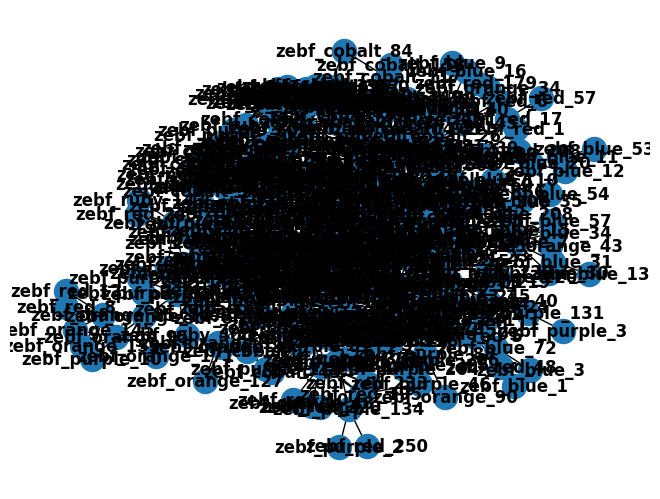

In [9]:
# Make a network for the birds now!
G = nx.Graph()

data = data.reset_index() # Make sure indexes pair with number of rows
for index, row in data.iterrows():
    G.add_nodes_from([(row['name'], {"alive": row['alive']})])
    G.add_edge(row['dam'], row['name'])
    G.add_edge(row['sire'], row['name'])

pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels=True, font_weight='bold', pos = pos)
plt.show()

In [13]:
# Use Pyvis to generate a dynamical network representation
# g = net.Network(height="750px", width="100%", bgcolor="#222222", font_color="white", select_menu=True, notebook=True)
g = net.Network(notebook=True)

node_degree = dict(G.degree) # Count the degree of the node

# Setting up node size attribute
nx.set_node_attributes(G, node_degree, 'size')

nxg = G
g.from_nx(nxg)
# g.toggle_physics(True) # Toggle the physic in-between nodes
# g.show(name="example.html", local=True, notebook=True)
g.show('example.html')

example.html


In [ ]:
# Extract the degree centrality
